## Question 3
### Neighbourhood Trends & Patterns

In [1]:
%matplotlib inline

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# plt.style.use('Solarize_Light2')
plt.style.use('bmh')

In [210]:
#Read in csv file and inspect dataframe
file = pd.read_csv('../resources/mci_no_duplicates_2014_and_over.csv')
mci_2014_onwards = pd.DataFrame(file)
mci_2014_onwards.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,2,GO-20141260701,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,3.0,...,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70)
1,3,GO-20141260889,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74)
2,4,GO-20141260973,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA
3,5,GO-20141261050,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,4.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66)
4,6,GO-20141259344,2014-01-01,2014-01-01,2014,January,1,1,Wednesday,2.0,...,Bar / Restaurant,Commercial,1420,110,Assault Bodily Harm,Assault,164,Wellington Place,77,Waterfront Communities-The Island (77)


In [211]:
#Check data types
mci_2014_onwards.dtypes

_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR             float64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

In [212]:
#Convert OCC_YEAR column from float to int then check dtypes again
mci_2014_onwards['OCC_YEAR'] = mci_2014_onwards['OCC_YEAR'].astype('int64')
mci_2014_onwards.dtypes


_id                    int64
EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
REPORT_YEAR            int64
REPORT_MONTH          object
REPORT_DAY             int64
REPORT_DOY             int64
REPORT_DOW            object
REPORT_HOUR          float64
OCC_YEAR               int64
OCC_MONTH             object
OCC_DAY              float64
OCC_DOY              float64
OCC_DOW               object
OCC_HOUR             float64
DIVISION              object
LOCATION_TYPE         object
PREMISES_TYPE         object
UCR_CODE               int64
UCR_EXT                int64
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
HOOD_140              object
NEIGHBOURHOOD_140     object
dtype: object

In [213]:
#Check for any null values
mci_2014_onwards.count()
#REPORT_HOUR and OCC_HOUR have some missing data, however those columns are not relevant for the analysis in this question and will be removed from the dataframe

_id                  298472
EVENT_UNIQUE_ID      298472
REPORT_DATE          298472
OCC_DATE             298472
REPORT_YEAR          298472
REPORT_MONTH         298472
REPORT_DAY           298472
REPORT_DOY           298472
REPORT_DOW           298472
REPORT_HOUR          288353
OCC_YEAR             298472
OCC_MONTH            298472
OCC_DAY              298472
OCC_DOY              298472
OCC_DOW              298472
OCC_HOUR             278293
DIVISION             298472
LOCATION_TYPE        298472
PREMISES_TYPE        298472
UCR_CODE             298472
UCR_EXT              298472
OFFENCE              298472
MCI_CATEGORY         298472
HOOD_158             298472
NEIGHBOURHOOD_158    298472
HOOD_140             298472
NEIGHBOURHOOD_140    298472
dtype: int64

In [216]:
#Keep only necessary columns and inspect dataframe again
mci_2014_onwards = mci_2014_onwards[['EVENT_UNIQUE_ID', 'REPORT_YEAR', 'REPORT_MONTH', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'LOCATION_TYPE', 
                                     'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
mci_2014_onwards.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,2014-01-01,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,70,South Riverdale
1,GO-20141260889,2014,January,2014-01-01,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,74,North St.James Town
3,GO-20141261050,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,69,Blake-Jones
4,GO-20141259344,2014,January,2014-01-01,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,164,Wellington Place
5,GO-20141260233,2014,January,2014-01-01,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E W'Intent,Break and Enter,126,Dorset Park


In [217]:
#Remove rows where HOOD_158 and NEIGHBOURHOOD_158 = NSA (no specified address) as per https://data.torontopolice.on.ca/datasets/TorontoPS::victims-of-crime-asr-vc-tbl-001/about
mci_2014_onwards = mci_2014_onwards.loc[mci_2014_onwards['HOOD_158'] != 'NSA']
mci_2014_onwards.head()
#This removed about 5,000 rows of data

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20141260701,2014,January,2014-01-01,2014,January,"Commercial Dwelling Unit (Hotel, Motel, B & B,...",Commercial,B&E,Break and Enter,70,South Riverdale
1,GO-20141260889,2014,January,2014-01-01,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,74,North St.James Town
3,GO-20141261050,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault,Assault,69,Blake-Jones
4,GO-20141259344,2014,January,2014-01-01,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,164,Wellington Place
5,GO-20141260233,2014,January,2014-01-01,2014,January,Other Commercial / Corporate Places (For Profi...,Commercial,B&E W'Intent,Break and Enter,126,Dorset Park


In [218]:
#Get total count of offences per neighbourhood for all years then sort in descending order
hood_total_offences = mci_2014_onwards.groupby('NEIGHBOURHOOD_158', as_index = False).size().rename(columns = {'size': 'Total Offences'}).sort_values(by = 'Total Offences', ascending = False)
hood_total_offences

,NEIGHBOURHOOD_158,Total Offences
139,West Humber-Clairville,8053
93,Moss Park,7320
36,Downtown Yonge East,6263
152,Yonge-Bay Corridor,5840
156,York University Heights,5746
...,...,...
155,Yonge-St.Clair,615
87,Maple Leaf,573
150,Woodbine-Lumsden,559
56,Guildwood,535


In [219]:
#Get top 3 neighbourhoods with highest number of offences
top_3_hoods = hood_total_offences.head(3)
#Get bottom 3 neighbourhoods with highest number of offences
bottom_3_hoods = hood_total_offences.tail(3)

#Get top 10 neighbourhoods
top_10_hoods = hood_total_offences.head(10)
#Get bottom 10 neighbourhoods
bottom_10_hoods = hood_total_offences.tail(10)

In [220]:
#Inspect top_3_hoods & bottom_3_hoods
print(bottom_3_hoods)
print(top_3_hoods)

      NEIGHBOURHOOD_158  Total Offences
150    Woodbine-Lumsden             559
56            Guildwood             535
78   Lambton Baby Point             478
          NEIGHBOURHOOD_158  Total Offences
139  West Humber-Clairville            8053
93                Moss Park            7320
36      Downtown Yonge East            6263


In [221]:
#Inspect top and bottom 10
print(bottom_10_hoods)
print(top_10_hoods)

            NEIGHBOURHOOD_158  Total Offences
64   Humber Heights-Westmount             713
4                    Avondale             701
24     Centennial Scarborough             677
107             Old East York             677
88              Markland Wood             626
155            Yonge-St.Clair             615
87                 Maple Leaf             573
150          Woodbine-Lumsden             559
56                  Guildwood             535
78         Lambton Baby Point             478
           NEIGHBOURHOOD_158  Total Offences
139   West Humber-Clairville            8053
93                 Moss Park            7320
36       Downtown Yonge East            6263
152       Yonge-Bay Corridor            5840
156  York University Heights            5746
137         Wellington Place            5669
74      Kensington-Chinatown            5333
138                West Hill            4648
3                      Annex            4391
53    Glenfield-Jane Heights            4004

In [222]:
#Store top 3 and bottom 3 neighbourhood names in a list
top_3_names = list(top_3_hoods['NEIGHBOURHOOD_158'])
bottom_3_names = list(bottom_3_hoods['NEIGHBOURHOOD_158'])

#Store top 10 and bottom 10 neighbourhood names in a list
top_10_names = list(top_10_hoods['NEIGHBOURHOOD_158'])
bottom_10_names = list(bottom_10_hoods['NEIGHBOURHOOD_158'])

## Top 3 Neighbourhoods
### West Humber-Clairville, Moss Park & Downtown Yonge East

In [52]:
#Create 3 new dataframes from mci_2014_onwards for each of the top 3 neighbourhoods
whc_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Humber-Clairville']
mp_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Moss Park']
dye_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Downtown Yonge East']

In [14]:
#Rename location types for readability; to be used in functions later 
renamed_locations = {'Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg': 'Other Commercial Places',
                    'Construction Site (Warehouse, Trailer, Shed)': 'Construction Site', 
                    'Single Home, House (Attach Garage, Cottage, Mobile)': 'Single Home/House',
                    'Parking Lots (Apt., Commercial Or Non-Commercial)': 'Parking Lots',
                    'Retirement Home': 'Retirement Home', 'Apartment (Rooming House, Condo)': 'Apartment',
                    'Streets, Roads, Highways (Bicycle Path, Private Road)': 'Streets, Roads, Highways',
                    'Bar / Restaurant': 'Bar/Restaurant', 'Ttc Bus Stop / Shelter / Loop': 'Public Transit',
                    'Schools During Supervised Activity': 'Schools, Supervised',
                    'Hospital / Institutions / Medical Facilities (Clinic, Dentist, Morgue)': 'Medical Facilities',
                    'Open Areas (Lakes, Parks, Rivers)': 'Open Areas', 'Dealership (Car, Motorcycle, Marine, Trailer, Etc.)': 'Dealership',
                    'Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)': 'Commercial Dwelling Unit',
                    'Jails / Detention Centres': 'Jails/Detention Centres',
                    "Other Non Commercial / Corporate Places (Non-Profit, Gov'T, Firehall)": 'Other Non Commercial Places',
                    'Go Train': 'Public Transit', 'Private Property Structure (Pool, Shed, Detached Garage)': 'Private Property Structure',
                    'Religious Facilities (Synagogue, Church, Convent, Mosque)': 'Religious Facilities',
                    'Police / Courts (Parole Board, Probation Office)': 'Police/Courts', 'Convenience Stores': 'Convenience Stores',
                    'Gas Station (Self, Full, Attached Convenience)': 'Gas Stations', 'Go Station': 'Public Transit',
                    'Group Homes (Non-Profit, Halfway House, Social Agency)': 'Group Homes', 'Schools During Un-Supervised Activity': 'Schools, Unsupervised',
                    'Ttc Bus': 'Public Transit', 'Cargo Train': 'Cargo Train', 'Bank And Other Financial Institutions (Money Mart, Tsx)': 'Financial Institutions',
                    'Universities / Colleges': 'Secondary Education', 'Go Bus': 'Public Transit', 'Other Regional Transit System Vehicle': 'Public Transit',
                    'Nursing Home': 'Nursing Home', 'Community Group Home': 'Group Homes', 'Pharmacy': 'Pharmacy', 'Homeless Shelter / Mission': 'Homeless Shelters'}

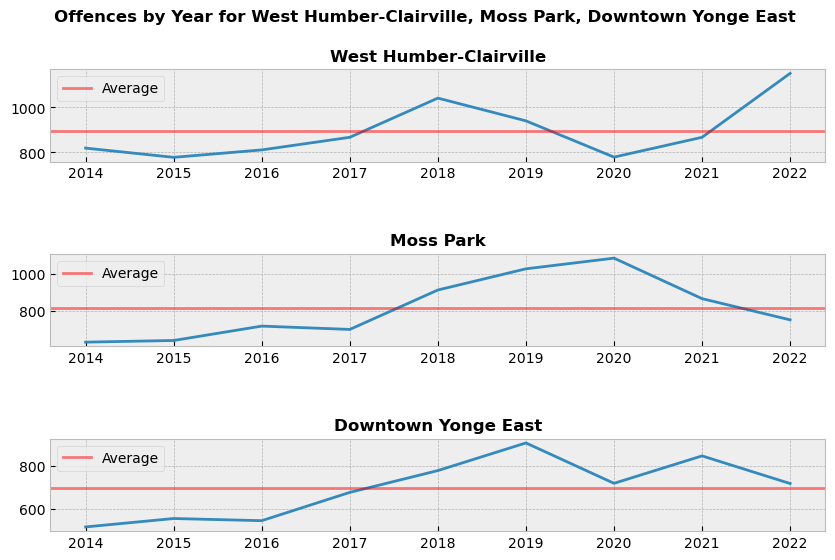

In [27]:
#Define function to get offences by year for top 3 neighbourhoods
def offences_by_year(df1, df2, df3, hood1, hood2, hood3, hood_names):
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First neighbourhood
    #Group by year and get count of offences
    hood1_year = df1.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year1 = ax[0].plot(hood1_year['OCC_YEAR'], hood1_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[0].axhline(y = hood1_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[0].set_title(f'{hood1}', fontdict = titles_fontdict)
    ax[0].legend(loc = 'upper left')

    #Second neighbourhood
    #Group by year and get count of offences
    hood2_year = df2.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year2 = ax[1].plot(hood2_year['OCC_YEAR'], hood2_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[1].axhline(y = hood2_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[1].set_title(f'{hood2}', fontdict = titles_fontdict)
    ax[1].legend(loc = 'upper left')

    #Third neighbourhood
    #Group by year and get count of offences
    hood3_year = df3.groupby('OCC_YEAR', as_index = False)['MCI_CATEGORY'].count()
    #Create first plot ax[0]
    year3 = ax[2].plot(hood3_year['OCC_YEAR'], hood3_year['MCI_CATEGORY'])
    #Insert a horizontal line representing the average count of offences across all years for that neighbourhood
    ax[2].axhline(y = hood3_year['MCI_CATEGORY'].mean(), color = 'r', alpha = 0.5, label = 'Average')
    #Set plot title, axis labels and legend
    ax[2].set_title(f'{hood3}', fontdict = titles_fontdict)
    ax[2].legend(loc = 'upper left')

    #Set figure title
    fig.suptitle(f"Offences by Year for {', '.join(hood_names)}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 1)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_plots.png")
    plt.show()

#Call function for top 3 neighbourhoods
offences_by_year(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)
    

In [92]:
#Define function to get percentage of offence categories for each neighbourhood and generate 3 plots on the same figure
def offence_pct_plot(df1, df2, df3, hood1, hood2, hood3, hood_names):
    #For each neighbourhood: group by MCI categories and get the count of each category, then add a new column to get the percentage of each category
    category1 = df1.groupby('MCI_CATEGORY', as_index = False)['EVENT_UNIQUE_ID'].count().rename(columns = {'MCI_CATEGORY': 'Offence Category', 'EVENT_UNIQUE_ID': 'Count'})
    #Get the sum of offences for the neighbourhood
    offence_sum1 = category1['Count'].sum()
    #Add a new column for the % of total offences
    category1['Pct of Total Offences'] = round((category1['Count'] / offence_sum1) * 100, 1)

    #For each neighbourhood: group by MCI categories and get the count of each category, then add a new column to get the percentage of each category
    category2 = df2.groupby('MCI_CATEGORY', as_index = False)['EVENT_UNIQUE_ID'].count().rename(columns = {'MCI_CATEGORY': 'Offence Category', 'EVENT_UNIQUE_ID': 'Count'})
    #Get the sum of offences for the neighbourhood
    offence_sum2 = category2['Count'].sum()
    #Add a new column for the % of total offences
    category2['Pct of Total Offences'] = round((category2['Count'] / offence_sum2) * 100, 1)

    #For each neighbourhood: group by MCI categories and get the count of each category, then add a new column to get the percentage of each category
    category3 = df3.groupby('MCI_CATEGORY', as_index = False)['EVENT_UNIQUE_ID'].count().rename(columns = {'MCI_CATEGORY': 'Offence Category', 'EVENT_UNIQUE_ID': 'Count'})
    #Get the sum of offences for the neighbourhood
    offence_sum3 = category3['Count'].sum()
    #Add a new column for the % of total offences
    category3['Pct of Total Offences'] = round((category3['Count'] / offence_sum3) * 100, 1)

    #Generate figure and subplots, set figure size and figure title weight
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700

    #Generate first plot ax[0], set title and bar labels
    category_hood1 = ax[0].bar(category1['Offence Category'], category1['Pct of Total Offences'])
    ax[0].set_title(f'{hood1}', fontdict = {'weight': 700, 'size': 12})
    for container in ax[0].containers:
        ax[0].bar_label(container, label_type = 'center')

    #Generate second plot ax[1], set title and bar labels
    category_hood2 = ax[1].bar(category2['Offence Category'], category2['Pct of Total Offences'])
    ax[1].set_title(f'{hood2}', fontdict = {'weight': 700, 'size': 12})
    for container in ax[1].containers:
        ax[1].bar_label(container, label_type = 'center')

    #Generate third plot ax[2], set title and bar labels
    category_hood3 = ax[2].bar(category3['Offence Category'], category3['Pct of Total Offences'])
    ax[2].set_title(f'{hood3}', fontdict = {'weight': 700, 'size': 12})
    for container in ax[2].containers:
        ax[2].bar_label(container, label_type = 'center')

    #Set figure title
    fig.suptitle(f"% of Offence Categories for {', '.join(hood_names)}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 1)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_pct_categories.png")
    plt.show()


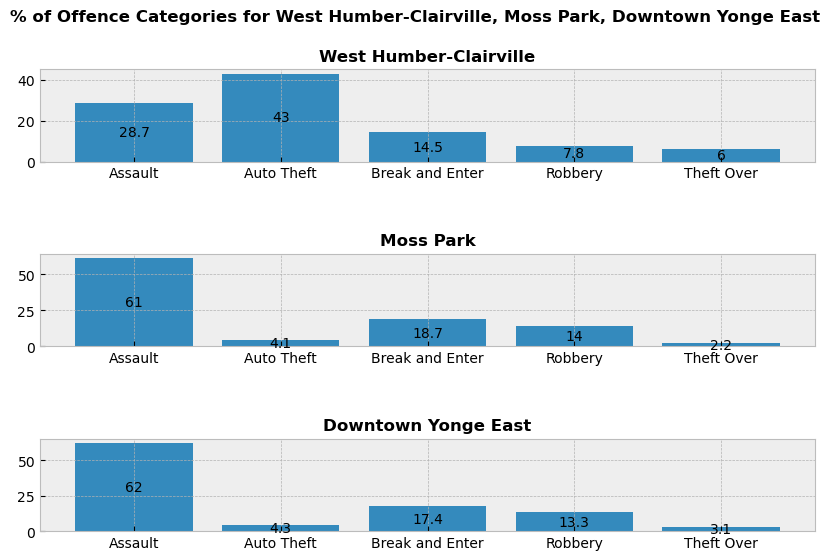

In [93]:
#Call function for top 3 neighbourhoods
offence_pct_plot(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)


In [132]:
#Define function for percentage of location types
def location_types_pct(df1, df2, df3, hood1, hood2, hood3, hood_names):
    #For each neighbourhood: Group by location type and get the count of offences
    hood1_location = df1.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename locations for readability, rename columns, sort by descending and reset index
    hood1_location = hood1_location.rename(renamed_locations).sort_values(ascending = False).reset_index()
    hood1_location = hood1_location.rename(columns = {'LOCATION_TYPE': 'Location', 'EVENT_UNIQUE_ID': 'Count'})
    #Store top 5 location types in a variable
    hood1_top_locations = hood1_location.head(5)
    #Store sum of location types count in variable
    hood1_location_sum = hood1_location['Count'].sum()
    #Add column to hood1_top_locations for the percentage: count of locations divided by sum, times 100 and rounded to 1 decimal point
    hood1_top_locations['Pct of Locations'] = round((hood1_top_locations['Count'] / hood1_location_sum) * 100, 1)

    #Group by location type and get the count of offences
    hood2_location = df2.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename locations for readability, rename columns, sort by descending and reset index
    hood2_location = hood2_location.rename(renamed_locations).sort_values(ascending = False).reset_index()
    hood2_location = hood2_location.rename(columns = {'LOCATION_TYPE': 'Location', 'EVENT_UNIQUE_ID': 'Count'})
    #Store top 5 location types in a variable
    hood2_top_locations = hood2_location.head(5)
    #Store sum of location types count in variable
    hood2_location_sum = hood2_location['Count'].sum()
    #Add column to hood2_top_locations for the percentage: count of locations divided by sum, times 100 and rounded to 1 decimal point
    hood2_top_locations['Pct of Locations'] = round((hood2_top_locations['Count'] / hood2_location_sum) * 100, 1)

    #Group by location type and get the count of offences
    hood3_location = df3.groupby('LOCATION_TYPE')['EVENT_UNIQUE_ID'].count()
    #Rename locations for readability, rename columns, sort by descending and reset index
    hood3_location = hood3_location.rename(renamed_locations).sort_values(ascending = False).reset_index()
    hood3_location = hood3_location.rename(columns = {'LOCATION_TYPE': 'Location', 'EVENT_UNIQUE_ID': 'Count'})
    #Store top 5 location types in a variable
    hood3_top_locations = hood3_location.head(5)
    #Store sum of location types count in variable
    hood3_location_sum = hood3_location['Count'].sum()
    #Add column to hood3_top_locations for the percentage: count of locations divided by sum, times 100 and rounded to 1 decimal point
    hood3_top_locations['Pct of Locations'] = round((hood3_top_locations['Count'] / hood3_location_sum) * 100, 1)

    #Generate figure and subplots, set figure size and figure title weight
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700
    plt.rcParams['xtick.labelsize'] = 6.5

    #Generate first plot ax[0], set title and bar labels
    locations1 = ax[0].bar(hood1_top_locations['Location'], hood1_top_locations['Pct of Locations'])    
    ax[0].set_title(f'{hood1}', fontdict = {'weight': 700, 'size': 12})
    for container in ax[0].containers:
        ax[0].bar_label(container, label_type = 'center')

    #Generate second plot ax[1], set title and bar labels
    locations2 = ax[1].bar(hood2_top_locations['Location'], hood2_top_locations['Pct of Locations'])    
    ax[1].set_title(f'{hood2}', fontdict = {'weight': 700, 'size': 12})
    for container in ax[1].containers:
        ax[1].bar_label(container, label_type = 'center')

    #Generate third plot ax[2], set title and bar labels
    locations3 = ax[2].bar(hood3_top_locations['Location'], hood3_top_locations['Pct of Locations'])    
    ax[2].set_title(f'{hood3}', fontdict = {'weight': 700, 'size': 12})
    for container in ax[2].containers:
        ax[2].bar_label(container, label_type = 'center')

    #Set figure title
    fig.suptitle(f"% of Location Types for {', '.join(hood_names)}")

    #Adjust space between subplots for readability, save figure and show 
    plt.subplots_adjust(hspace = 1)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_pct_locations.png")
    plt.show()



/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/3487148675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hood1_top_locations['Pct of Locations'] = round((hood1_top_locations['Count'] / hood1_location_sum) * 100, 1)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/3487148675.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hood2_top_locations['Pct of Locations'] = round((hood2_top_locations['Count'] / hood2_location_sum) * 100, 1)
/var/folders/m2/ysnn55010957_py0m5

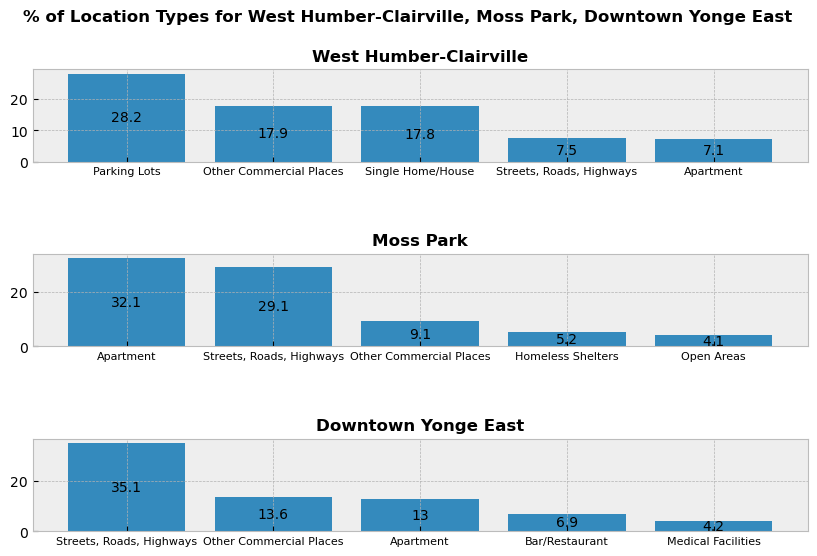

In [133]:
#Call location_types_pct function
location_types_pct(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)


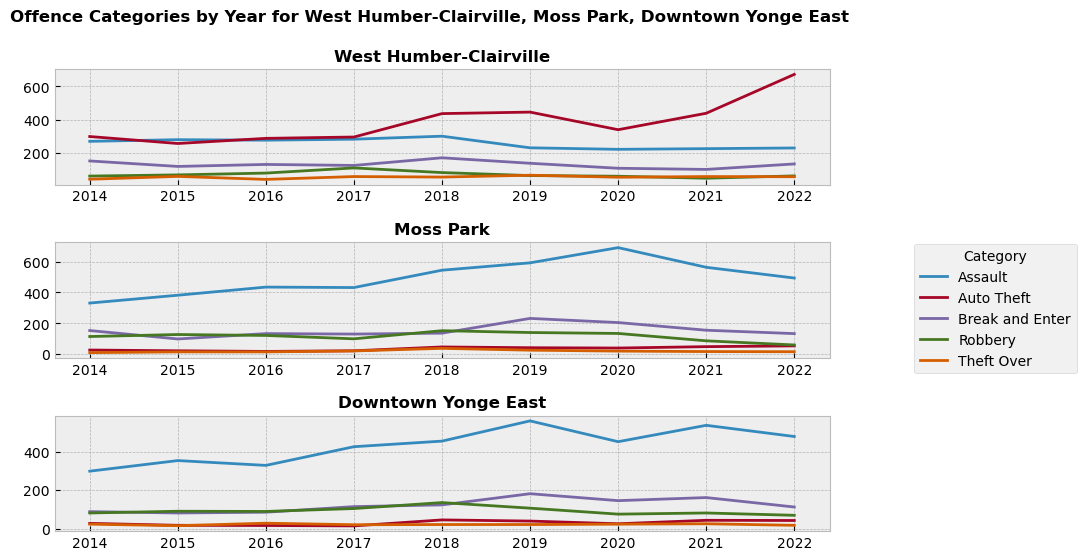

In [30]:
#Define function to get line plots of offence categories by year for neighbourhoods
def categories_by_year(df1, df2, df3, hood1, hood2, hood3, hood_names):
    fig, ax = plt.subplots(nrows = 3, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700
    titles_fontdict = {'weight': 700, 'size': 12}

    #First neighbourhood
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood1_assault = df1.loc[df1['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_auto_theft = df1.loc[df1['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_break_enter = df1.loc[df1['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_robbery = df1.loc[df1['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood1_theft_over = df1.loc[df1['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[0].plot(hood1_assault.index, hood1_assault.values, label = 'Assault')
    ax[0].plot(hood1_auto_theft.index, hood1_auto_theft.values, label = 'Auto Theft')
    ax[0].plot(hood1_break_enter.index, hood1_break_enter.values, label = 'Break and Enter')
    ax[0].plot(hood1_robbery.index, hood1_robbery.values, label = 'Robbery')
    ax[0].plot(hood1_theft_over.index, hood1_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[0].set_title(f'{hood1}', fontdict = titles_fontdict)
    #ax[0].legend(bbox_to_anchor=(1.1, 1.05))

    #Second neighbourhood
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood2_assault = df2.loc[df2['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_auto_theft = df2.loc[df2['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_break_enter = df2.loc[df2['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_robbery = df2.loc[df2['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood2_theft_over = df2.loc[df2['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[1].plot(hood2_assault.index, hood2_assault.values, label = 'Assault')
    ax[1].plot(hood2_auto_theft.index, hood2_auto_theft.values, label = 'Auto Theft')
    ax[1].plot(hood2_break_enter.index, hood2_break_enter.values, label = 'Break and Enter')
    ax[1].plot(hood2_robbery.index, hood2_robbery.values, label = 'Robbery')
    ax[1].plot(hood2_theft_over.index, hood2_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[1].set_title(f'{hood2}', fontdict = titles_fontdict)
    ax[1].legend(bbox_to_anchor=(1.1, 1.05), title = 'Category')

    #Third neighbourhood
    #For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by year to get the count
    hood3_assault = df3.loc[df3['MCI_CATEGORY'] == 'Assault'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_auto_theft = df3.loc[df3['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_break_enter = df3.loc[df3['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_robbery = df3.loc[df3['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    hood3_theft_over = df3.loc[df3['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_YEAR')['EVENT_UNIQUE_ID'].count()
    #Create 5 line plots for each MCI category on the same plot
    ax[2].plot(hood3_assault.index, hood3_assault.values, label = 'Assault')
    ax[2].plot(hood3_auto_theft.index, hood3_auto_theft.values, label = 'Auto Theft')
    ax[2].plot(hood3_break_enter.index, hood3_break_enter.values, label = 'Break and Enter')
    ax[2].plot(hood3_robbery.index, hood3_robbery.values, label = 'Robbery')
    ax[2].plot(hood3_theft_over.index, hood3_theft_over.values, label = 'Theft Over')
    #Set title and legend
    ax[2].set_title(f'{hood3}', fontdict = titles_fontdict)
    #ax[2].legend(bbox_to_anchor=(1.1, 1.05))

    #Set figure title
    fig.suptitle(f"Offence Categories by Year for {', '.join(hood_names)}")

    #Adjust space between subplots for readability
    plt.subplots_adjust(hspace = 0.5)
    plt.savefig(f"../../Project 1 Output/{', '.join(hood_names)}_categories.png")
    plt.show()

#Call function for top 3 neighbourhoods
categories_by_year(whc_hood, mp_hood, dye_hood, 'West Humber-Clairville', 'Moss Park', 'Downtown Yonge East', top_3_names)


## Bottom 3 Neighbourhoods
### Woodbine-Lumsden, Guildwood & Lambton Baby Point

In [95]:
#Create 3 new dataframes from mci_2014_onwards for each of the bottom 3 neighbourhoods 
wl_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden']
gw_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Guildwood']
lbp_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Lambton Baby Point']

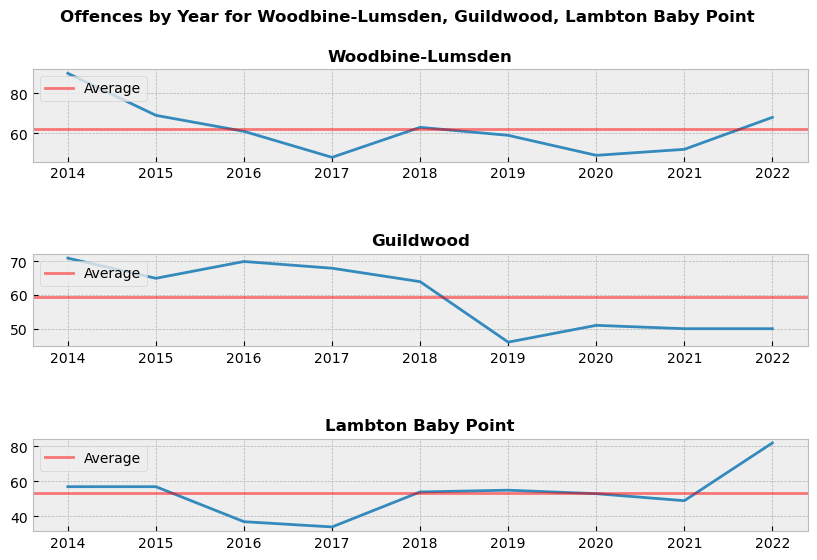

In [32]:
#Call offences_by_year function for bottom 3 neighbourhoods
offences_by_year(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

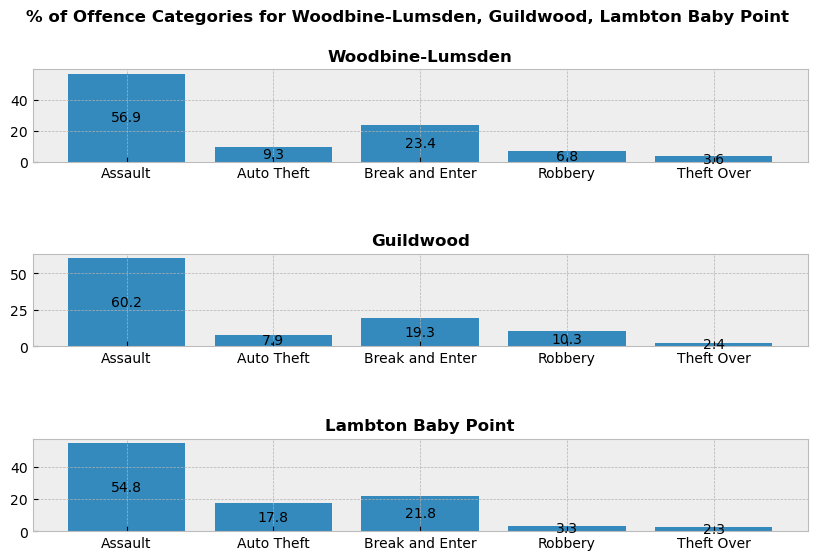

In [96]:
#Call offence_pct_plot function
offence_pct_plot(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/3487148675.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hood1_top_locations['Pct of Locations'] = round((hood1_top_locations['Count'] / hood1_location_sum) * 100, 1)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/3487148675.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hood2_top_locations['Pct of Locations'] = round((hood2_top_locations['Count'] / hood2_location_sum) * 100, 1)
/var/folders/m2/ysnn55010957_py0m5

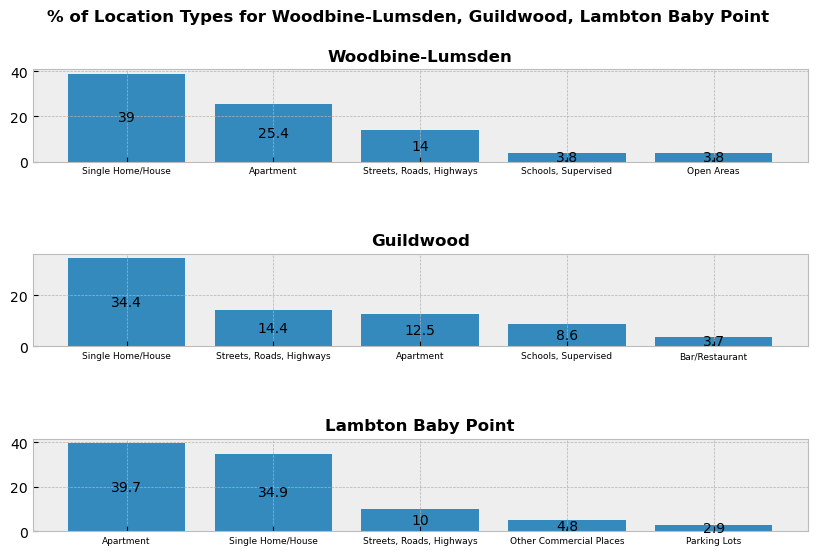

In [134]:
#Call location_types_pct function for bottom 3 neighbourhoods
location_types_pct(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

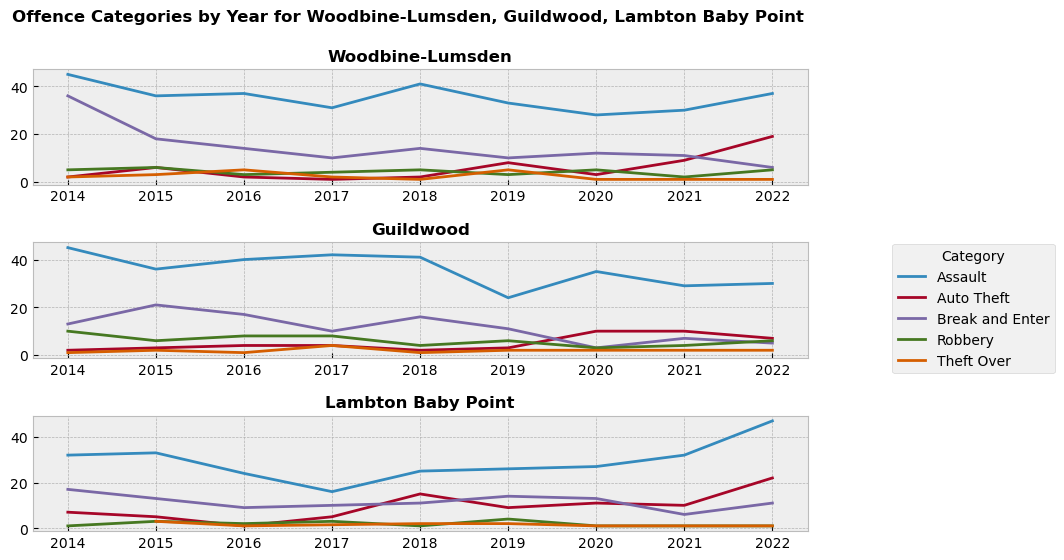

In [35]:
#Call categories_by_year function for bottom 3 neighbourhoods
categories_by_year(wl_hood, gw_hood, lbp_hood, 'Woodbine-Lumsden', 'Guildwood', 'Lambton Baby Point', bottom_3_names)

## Top and Bottom 10 Neighbourhoods: Aggregate

In [224]:
#Use .loc on mci_2014_onwards to get the rows for the top 10 neighbourhoods
top_10_df = mci_2014_onwards.loc[(mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Humber-Clairville') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Moss Park') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Downtown Yonge East') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Yonge-Bay Corridor') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'York University Heights') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Wellington Place') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Kensington-Chinatown') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'West Hill') |
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Annex') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Glenfield-Jane Heights')]
top_10_df.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
4,GO-20141259344,2014,January,2014-01-01,2014,January,Bar / Restaurant,Commercial,Assault Bodily Harm,Assault,164,Wellington Place
9,GO-20141260056,2014,January,2014-01-01,2014,January,Bar / Restaurant,Commercial,Assault,Assault,95,Annex
15,GO-20141260831,2014,January,2014-01-01,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E W'Intent,Break and Enter,136,West Hill
16,GO-20141260912,2014,January,2014-01-01,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery With Weapon,Robbery,164,Wellington Place
19,GO-20141261370,2014,January,2014-01-01,2014,January,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,27,York University Heights


In [234]:
#Repeat for bottom 10 neighbourhoods
bottom_10_df = mci_2014_onwards.loc[(mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Humber Heights-Westmount') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Avondale') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Centennial Scarborough') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Old East York') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Markland Wood') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Yonge-St.Clair') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Maple Leaf') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Woodbine-Lumsden') |
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Guildwood') | 
                                (mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Lambton Baby Point')]
bottom_10_df.head()

,EVENT_UNIQUE_ID,REPORT_YEAR,REPORT_MONTH,OCC_DATE,OCC_YEAR,OCC_MONTH,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
51,GO-20141263536,2014,January,2014-01-01,2014,January,"Open Areas (Lakes, Parks, Rivers)",Outside,Assault,Assault,58,Old East York
95,GO-20141266240,2014,January,2014-01-02,2014,January,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,60,Woodbine-Lumsden
152,GO-20141275796,2014,January,2014-01-03,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,Break and Enter,133,Centennial Scarborough
166,GO-20141268130,2014,January,2014-01-03,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E W'Intent,Break and Enter,29,Maple Leaf
268,GO-20141286149,2014,January,2014-01-05,2014,January,"Single Home, House (Attach Garage, Cottage, Mo...",House,Theft Of Motor Vehicle,Auto Theft,153,Avondale


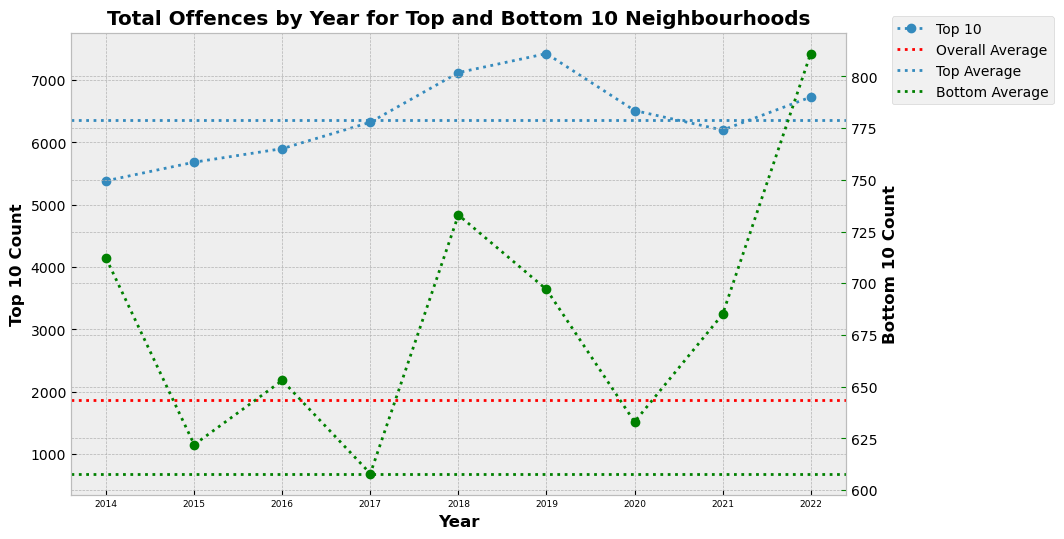

In [263]:
#DIFFERENT Y AXIS
#Plot offences by year for top and bottom 10 neighbourhoods
#Group by occurence year and get the count of offences
top_10_grouped = top_10_df.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
bottom_10_grouped = bottom_10_df.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
top_average = top_10_grouped.mean()
bottom_average = bottom_10_grouped.mean()
overall_avg = mci_2014_onwards.groupby('NEIGHBOURHOOD_158')['MCI_CATEGORY'].count().mean().round()
#Set figure with one plot
fig, ax = plt.subplots(nrows = 1, ncols = 1)
#Generate plot from the index and values of top_10_grouped as a dotted line with points 
ax.plot(top_10_grouped.index, top_10_grouped.values, 'o:', label = 'Top 10')
ax.tick_params(axis = 'y')
#Instantiate a second axe that shares the same x-axis
ax2 = ax.twinx()
ax2.plot(bottom_10_grouped.index, bottom_10_grouped.values, 'o:', label = 'Bottom 10', color = 'g')
ax2.tick_params(axis = 'y', color = 'g')
ax.axhline(y = overall_avg, label = 'Overall Average', color = 'r').set_linestyle(':')
ax.axhline(y = top_average, label = 'Top Average').set_linestyle(':')
ax.axhline(y = bottom_average, label = 'Bottom Average', color = 'g').set_linestyle(':')
#Set title, axis labels and legend
ax.set_title('Total Offences by Year for Top and Bottom 10 Neighbourhoods', fontdict = {'weight': 700})
ax.set_ylabel('Top 10 Count', fontdict = {'weight': 700, 'size': 12})
ax2.set_ylabel('Bottom 10 Count', fontdict = {'weight': 700, 'size': 12})
ax.set_xlabel('Year', fontdict = {'weight': 700, 'size': 12})
ax.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()

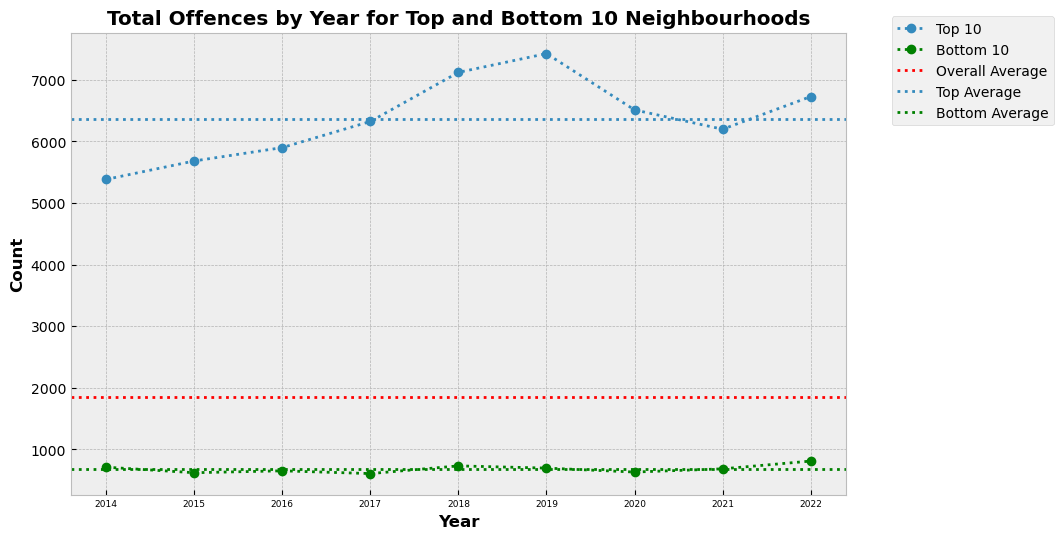

In [264]:
#SHARED Y AXIS
#Plot offences by year for top and bottom 10 neighbourhoods
#Group by occurence year and get the count of offences
top_10_grouped = top_10_df.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
bottom_10_grouped = bottom_10_df.groupby('OCC_YEAR')['MCI_CATEGORY'].count()
top_average = top_10_grouped.mean()
bottom_average = bottom_10_grouped.mean()
overall_avg = mci_2014_onwards.groupby('NEIGHBOURHOOD_158')['MCI_CATEGORY'].count().mean().round()
#Set figure with one plot
fig, ax = plt.subplots(nrows = 1, ncols = 1)
#Generate plot from the index and values of top_10_grouped as a dotted line with points 
ax.plot(top_10_grouped.index, top_10_grouped.values, 'o:', label = 'Top 10')
ax.plot(bottom_10_grouped.index, bottom_10_grouped.values, 'o:', label = 'Bottom 10', color = 'g')
ax.axhline(y = overall_avg, label = 'Overall Average', color = 'r').set_linestyle(':')
ax.axhline(y = top_average, label = 'Top Average').set_linestyle(':')
ax.axhline(y = bottom_average, label = 'Bottom Average', color = 'g').set_linestyle(':')
#Set title, axis labels and legend
ax.set_title('Total Offences by Year for Top and Bottom 10 Neighbourhoods', fontdict = {'weight': 700})
ax.set_ylabel('Count', fontdict = {'weight': 700, 'size': 12})
ax.set_xlabel('Year', fontdict = {'weight': 700, 'size': 12})
ax.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()

## Year over Year Change in Neighbourhoods
### Analyze the neighbourhood with the greatest YoY increase, and the neighbourhood with the greatest YoY decrease.

In [138]:
#Group mci_2014_onwards by neighbourhood and year, then get the count of MCI categories and rename the columns
neighbourhood_offences = mci_2014_onwards.groupby(['NEIGHBOURHOOD_158', 'OCC_YEAR'], as_index = False)['MCI_CATEGORY'].count()
neighbourhood_offences = neighbourhood_offences.rename(columns = {'NEIGHBOURHOOD_158': 'Neighbourhood', 'OCC_YEAR': 'Occupation Year', 'MCI_CATEGORY': 'Offences'})

In [139]:
#Add a new column to neighbourhood_offences to calculate the year-over-year change in offences using .pct_change()
neighbourhood_offences['YoY % Change'] = (round(neighbourhood_offences['Offences'].pct_change() * 100, 2))
#Change the values for 2014 to 0 as this dataset begins in 2014
neighbourhood_offences.loc[neighbourhood_offences['Occupation Year'] == 2014, 'YoY % Change'] = 0
neighbourhood_offences

,Neighbourhood,Occupation Year,Offences,YoY % Change
0,Agincourt North,2014,170,0.00
1,Agincourt North,2015,183,7.65
2,Agincourt North,2016,157,-14.21
3,Agincourt North,2017,175,11.46
4,Agincourt North,2018,226,29.14
...,...,...,...,...
1426,Yorkdale-Glen Park,2018,324,8.36
1427,Yorkdale-Glen Park,2019,400,23.46
1428,Yorkdale-Glen Park,2020,342,-14.50
1429,Yorkdale-Glen Park,2021,316,-7.60


In [196]:
#Sort neighbourhood_offences by YoY % Change in descending order to get neighbourhoods with greatest YoY change
descending_neighbourhood_offences = neighbourhood_offences.sort_values(by = 'YoY % Change', ascending = False)
descending_neighbourhood_offences.head()

,Neighbourhood,Occupation Year,Offences,YoY % Change
462,Forest Hill South,2017,107,94.55
26,Alderwood,2022,148,89.74
453,Forest Hill North,2017,106,89.29
791,Maple Leaf,2022,111,85.00
867,Mount Pleasant East,2017,84,82.61


In [197]:
#Sort neighbourhood_offences by YoY % Change in ascending order to get neighbourhoods with least YoY change
ascending_neighbourhood_offences = neighbourhood_offences.sort_values(by = 'YoY % Change')
ascending_neighbourhood_offences.head()

,Neighbourhood,Occupation Year,Offences,YoY % Change
555,Highland Creek,2020,59,-52.80
793,Markland Wood,2015,48,-47.25
786,Maple Leaf,2017,40,-45.95
780,Malvern West,2020,114,-43.00
690,Kingsway South,2020,54,-40.66


In [205]:
#Separate highest (Forest Hill South) and lowest (Highland Creek) neighbourhood in their own dataframes
fhs_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Forest Hill South']
hc_hood = mci_2014_onwards.loc[mci_2014_onwards['NEIGHBOURHOOD_158'] == 'Highland Creek']

In [174]:
#Define a function to generate 2 plots on the same figure showing the offence categories by month in the year before and year of
def year_comparison(year1, year2, df, hood, ylim):
    #Create 2 dataframes for the 2 years
    year1_df = df.loc[df['OCC_YEAR'] == year1]
    year2_df = df.loc[df['OCC_YEAR'] == year2]

    #Use pd.Categorical to sort months in chronological order in new dataframes
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    year1_df['OCC_MONTH'] = pd.Categorical(year1_df['OCC_MONTH'], categories = months, ordered = True)
    year2_df['OCC_MONTH'] = pd.Categorical(year2_df['OCC_MONTH'], categories = months, ordered = True)

    #Create figure with 2 subplots, set figure size and figure title weight using rcParams
    fig, ax = plt.subplots(nrows = 2, ncols = 1)
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['figure.titleweight'] = 700

    #Year 1: For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by month to get the count
    year1_assault = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year1_auto_theft = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year1_break_enter = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year1_robbery = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year1_theft_over = year1_df.loc[year1_df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()

    #Year 2: For each MCI category, isolate rows from neighbourhood dataframe that correspond with the category and group by month to get the count
    year2_assault = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Assault'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year2_auto_theft = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Auto Theft'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year2_break_enter = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Break and Enter'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year2_robbery = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Robbery'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    year2_theft_over = year2_df.loc[year2_df['MCI_CATEGORY'] == 'Theft Over'].groupby('OCC_MONTH')['EVENT_UNIQUE_ID'].count()
    
    #Create 5 line plots for each MCI category on the same plot for year 1
    ax[0].plot(year1_assault.index, year1_assault.values, label = 'Assault')
    ax[0].plot(year1_auto_theft.index, year1_auto_theft.values, label = 'Auto Theft')
    ax[0].plot(year1_break_enter.index, year1_break_enter.values, label = 'Break and Enter')
    ax[0].plot(year1_robbery.index, year1_robbery.values, label = 'Robbery')
    ax[0].plot(year1_theft_over.index, year1_theft_over.values, label = 'Theft Over')
    #Set ylim to match the scale of the y axis for ax[1]
    ax[0].set_ylim(0, ylim)
    #Set x ticks rotation and labels
    ax[0].set_xticks(ticks=np.arange(12), labels=[m[0:3] for m in year1_assault.index])
    #Set title and legend
    ax[0].set_title(year1, fontdict = {'weight': 700, 'size': 12})
    ax[0].legend(bbox_to_anchor=(1.05, .05), title = 'Category')   

    #Create 5 line plots for each MCI category on the same plot for year 2
    ax[1].plot(year2_assault.index, year2_assault.values, label = 'Assault')
    ax[1].plot(year2_auto_theft.index, year2_auto_theft.values, label = 'Auto Theft')
    ax[1].plot(year2_break_enter.index, year2_break_enter.values, label = 'Break and Enter')
    ax[1].plot(year2_robbery.index, year2_robbery.values, label = 'Robbery')
    ax[1].plot(year2_theft_over.index, year2_theft_over.values, label = 'Theft Over')
    #Set ylim for ax[0] and ax[1] x axes to match
    ax[1].set_ylim(0, ylim)
    #Set x ticks rotation and labels
    ax[1].set_xticks(ticks=np.arange(12), labels=[m[0:3] for m in year2_assault.index])
    #Set title and legend
    ax[1].set_title(year2, fontdict = {'weight': 700, 'size': 12})

    #Set figure title
    fig.suptitle(f'Offence Categories by Month for {hood}, {year1}-{year2}')

    #Adjust space between subplots for readability and show figure
    plt.subplots_adjust(hspace = 0.5)
    plt.show()

    


/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/1009430253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['OCC_MONTH'] = pd.Categorical(year1_df['OCC_MONTH'], categories = months, ordered = True)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/1009430253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2_df['OCC_MONTH'] = pd.Categorical(year2_df['OCC_MONTH'], categories = months, ordered = True)


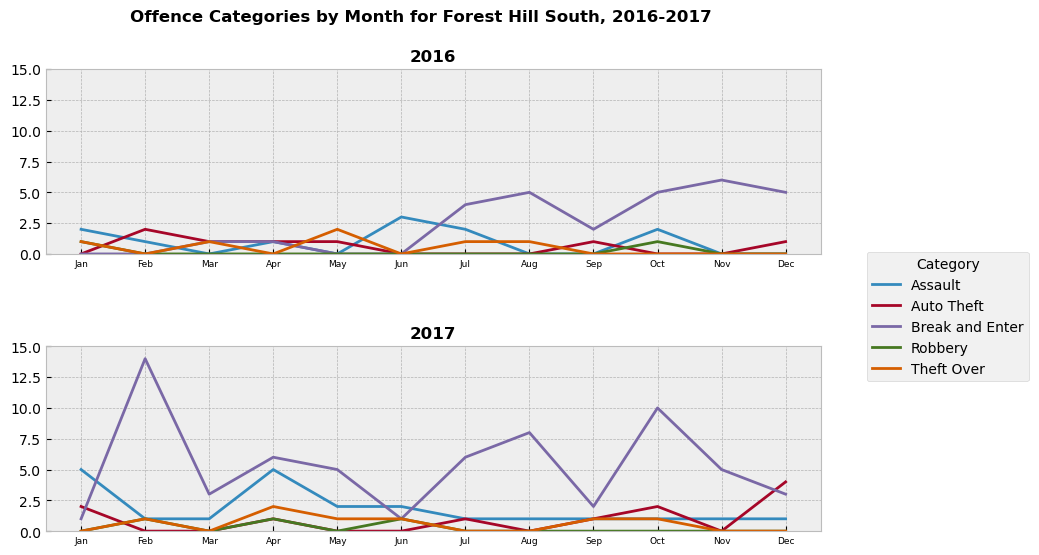

In [175]:
#Call year_comparison function for Forest Hill South, 2016 vs 2017
year_comparison(2016, 2017, fhs_hood, 'Forest Hill South', 15)

In [192]:
#Get percentage change in offence categories 2016 vs 2017 for Forest Hill South
fhs_2016_off = fhs_hood.loc[fhs_hood['OCC_YEAR'] == 2016].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_UNIQUE_ID'].count()
fhs_2017_off = fhs_hood.loc[fhs_hood['OCC_YEAR'] == 2017].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_UNIQUE_ID'].count()
print(fhs_2016_off)
print(fhs_2017_off)

   OCC_YEAR     MCI_CATEGORY  EVENT_UNIQUE_ID
0      2016          Assault               11
1      2016       Auto Theft                7
2      2016  Break and Enter               29
3      2016          Robbery                2
4      2016       Theft Over                6
   OCC_YEAR     MCI_CATEGORY  EVENT_UNIQUE_ID
0      2017          Assault               22
1      2017       Auto Theft               11
2      2017  Break and Enter               64
3      2017          Robbery                3
4      2017       Theft Over                7


/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/1009430253.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1_df['OCC_MONTH'] = pd.Categorical(year1_df['OCC_MONTH'], categories = months, ordered = True)
/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_82257/1009430253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2_df['OCC_MONTH'] = pd.Categorical(year2_df['OCC_MONTH'], categories = months, ordered = True)


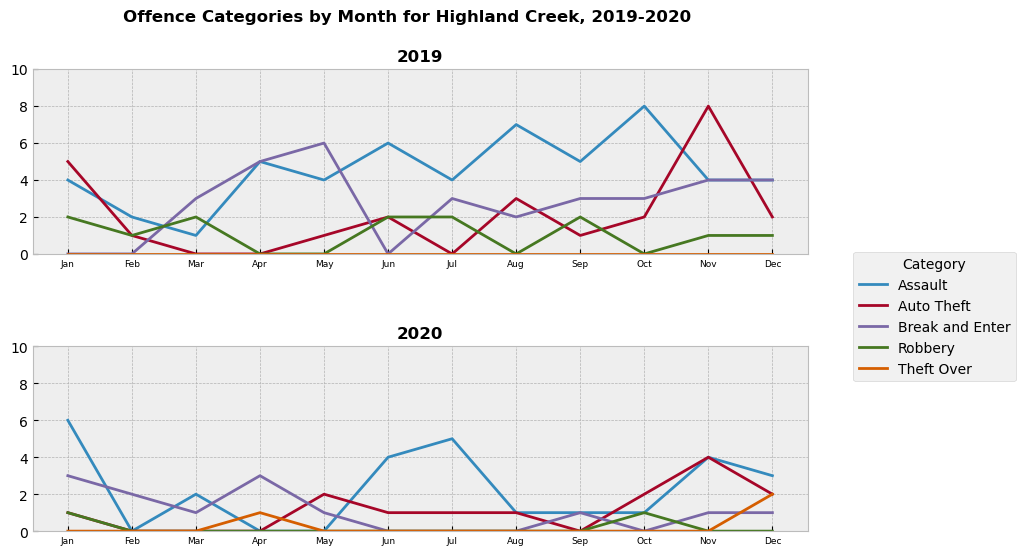

In [176]:
#Call year_comparison function for Highland Creek, 2019-2020
year_comparison(2019, 2020, hc_hood, 'Highland Creek', 10)

In [194]:
#Get percentage change in offence categories 2019 vs 2020 for Highland Creek
hc_2019_off = hc_hood.loc[hc_hood['OCC_YEAR'] == 2019].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_UNIQUE_ID'].count()
hc_2020_off = hc_hood.loc[hc_hood['OCC_YEAR'] == 2020].groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index = False)['EVENT_UNIQUE_ID'].count()
print(hc_2019_off)
print(hc_2020_off)

   OCC_YEAR     MCI_CATEGORY  EVENT_UNIQUE_ID
0      2019          Assault               54
1      2019       Auto Theft               25
2      2019  Break and Enter               33
3      2019          Robbery               13
   OCC_YEAR     MCI_CATEGORY  EVENT_UNIQUE_ID
0      2020          Assault               27
1      2020       Auto Theft               14
2      2020  Break and Enter               13
3      2020          Robbery                2
4      2020       Theft Over                3
